In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [25]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-01-11 00:51:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 2a00:1450:4013:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-01-11 00:51:05 (118 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [47]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length= max_sequence_len - 1)) # Your Embedding Layer)
model.add(LSTM(64, return_sequences= True)) # An LSTM Layer)
model.add(Dropout(0.2)) # A dropout layer)
model.add(LSTM(32)) # Another LSTM Layer)
model.add(Dense(512, activation= 'relu', kernel_regularizer= regularizers.l2(0.01))) # A Dense Layer including regularizers)
model.add(Dense(total_words, activation = 'softmax')) # A Dense Layer)
# Pick an optimizer
adam = Adam(lr= 0.01)
model.compile(loss='categorical_crossentropy' , optimizer=adam, metrics=['accuracy']) # Pick a loss function and an optimizer)
print(model.summary())


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 10, 100)           321100    
_________________________________________________________________
lstm_32 (LSTM)               (None, 10, 64)            42240     
_________________________________________________________________
dropout_13 (Dropout)         (None, 10, 64)            0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_20 (Dense)             (None, 512)               16896     
_________________________________________________________________
dense_21 (Dense)             (None, 3211)              1647243   
Total params: 2,039,895
Trainable params: 2,039,895
Non-trainable params: 0
___________________________________________

In [48]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 18s 1ms/sample - loss: 6.8596 - acc: 0.0228
Epoch 2/100
15462/15462 [==============================] - 15s 1ms/sample - loss: 6.5038 - acc: 0.0227
Epoch 3/100
15462/15462 [==============================] - 15s 998us/sample - loss: 6.4241 - acc: 0.0278
Epoch 4/100
15462/15462 [==============================] - 15s 991us/sample - loss: 6.3477 - acc: 0.0292
Epoch 5/100
15462/15462 [==============================] - 15s 997us/sample - loss: 6.2844 - acc: 0.0308
Epoch 6/100
15462/15462 [==============================] - 15s 993us/sample - loss: 6.2236 - acc: 0.0341
Epoch 7/100
15462/15462 [==============================] - 15s 993us/sample - loss: 6.1802 - acc: 0.0371
Epoch 8/100
15462/15462 [==============================] - 15s 981us/sample - loss: 6.1328 - acc: 0.0381
Epoch 9/100
15462/15462 [======================

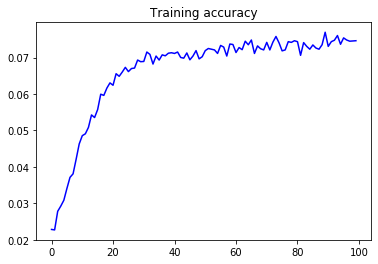

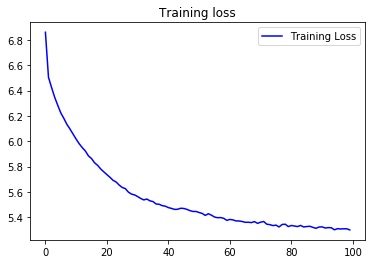

In [49]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [51]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope i be not for the world and not to be be not for the world and not to be be not for the world and not to be be not for the world and not to be be not for the world and not to be be not for the world and not to be be not for the world and not to be be not for the world and not to be be not for the world and not to be be not for the world and not to be be not for the world and not to be
